In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename, dims):
    with gzip.open(filename, "rb") as infile:
        # consume magic number
        infile.read(4)
        # consume dimensions data
        infile.read(4 * len(dims))

        return np.frombuffer(infile.read(np.prod(dims)), dtype=np.uint8).reshape(dims)

# training data
train_images = load_data("data/train-images-idx3-ubyte.gz", [60000, 28, 28])
train_labels = load_data("data/train-labels-idx1-ubyte.gz", [60000])

# testing data
test_images = load_data("data/t10k-images-idx3-ubyte.gz", [10000, 28, 28])
test_labels = load_data("data/t10k-labels-idx1-ubyte.gz", [10000])

In [2]:
train_x = train_images.astype(np.float) / 255
train_y = np.zeros((60000, 10))
train_y[np.arange(60000),train_labels] = 1

test_x = test_images.astype(np.float) / 255
test_y = np.zeros((10000, 10))
test_y[np.arange(10000),test_labels] = 1

In [3]:
import keras
import keras.layers as layers
import keras.models as models


convnet = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28,28)),
    layers.Conv2D(8, (5, 5), strides=(1, 1), activation="relu"),
    layers.Flatten(),
    layers.Dense(10, activation="sigmoid"),
])

convnet.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[keras.metrics.categorical_accuracy])

conv_history = convnet.fit(
    x=train_x,
    y=train_y,
    batch_size=64,
    epochs=25,
    verbose=1,
    validation_data=(test_x, test_y),
    shuffle=True,)

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 69us/step - loss: 0.0684 - categorical_accuracy: 0.9098 - val_loss: 0.0313 - val_categorical_accuracy: 0.9640
Epoch 2/25
60000/60000 [==============================] - 3s 49us/step - loss: 0.0272 - categorical_accuracy: 0.9686 - val_loss: 0.0210 - val_categorical_accuracy: 0.9762
Epoch 3/25
60000/60000 [==============================] - 3s 47us/step - loss: 0.0201 - categorical_accuracy: 0.9770 - val_loss: 0.0183 - val_categorical_accuracy: 0.9790
Epoch 4/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.0169 - categorical_accuracy: 0.9810 - val_loss: 0.0167 - val_categorical_accuracy: 0.9798
Epoch 5/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.0147 - categorical_accuracy: 0.9838 - val_loss: 0.0153 - val_categorical_accuracy: 0.9818
Epoch 6/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.0131 - categor

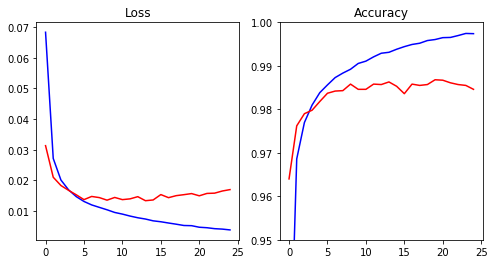

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), squeeze=True)
axes[0].set_title("Loss")
axes[0].plot(conv_history.history["loss"], c="b")
axes[0].plot(conv_history.history["val_loss"], c="r")

axes[1].set_title("Accuracy")
axes[1].set_ylim((0.95, 1))
axes[1].plot(conv_history.history["categorical_accuracy"], c="b")
axes[1].plot(conv_history.history["val_categorical_accuracy"], c="r")

In [5]:
from model import GaussMembership, normalized_product_fn


hybrid = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28,28)),
    layers.Conv2D(8, (5, 5), strides=(1, 1), activation="relu"),
    layers.Flatten(),
    GaussMembership(20),
    layers.Lambda(lambda x: normalized_product_fn(x)),
    layers.Dense(10, activation="sigmoid"),
])

hybrid.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[keras.metrics.categorical_accuracy])

hybrid_history = hybrid.fit(
    x=train_x,
    y=train_y,
    batch_size=64,
    epochs=25,
    verbose=1,
    validation_data=(test_x, test_y),
    shuffle=True,)

W0212 10:37:44.137183 140137268148032 deprecation.py:323] From /home/ryan-desktop/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.2561 - categorical_accuracy: 0.7143 - val_loss: 0.1505 - val_categorical_accuracy: 0.9411
Epoch 2/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.1052 - categorical_accuracy: 0.9518 - val_loss: 0.0736 - val_categorical_accuracy: 0.9629
Epoch 3/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.0579 - categorical_accuracy: 0.9666 - val_loss: 0.0455 - val_categorical_accuracy: 0.9684
Epoch 4/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.0381 - categorical_accuracy: 0.9751 - val_loss: 0.0327 - val_categorical_accuracy: 0.9753
Epoch 5/25
60000/60000 [==============================] - 5s 90us/step - loss: 0.0275 - categorical_accuracy: 0.9805 - val_loss: 0.0256 - val_categorical_accuracy: 0.9784
Epoch 6/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.0209 - categor

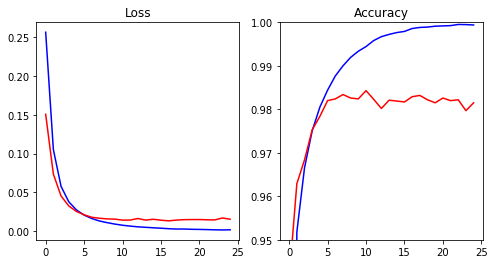

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), squeeze=True)
axes[0].set_title("Loss")
axes[0].plot(hybrid_history.history["loss"], c="b")
axes[0].plot(hybrid_history.history["val_loss"], c="r")

axes[1].set_title("Accuracy")
axes[1].set_ylim((0.95, 1))
axes[1].plot(hybrid_history.history["categorical_accuracy"], c="b")
axes[1].plot(hybrid_history.history["val_categorical_accuracy"], c="r")

In [7]:
hybrid2 = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28,28)),
    layers.Conv2D(8, (5, 5), strides=(1, 1), activation="relu"),
    layers.Flatten(),
    GaussMembership(20),
    layers.Lambda(lambda x: normalized_product_fn(x)),
    layers.Dense(10, activation="sigmoid"),
])

hybrid2.layers[1].set_weights(convnet.layers[1].get_weights())
hybrid2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[keras.metrics.categorical_accuracy])

hybrid2_history = hybrid2.fit(
    x=train_x,
    y=train_y,
    batch_size=64,
    epochs=25,
    verbose=1,
    validation_data=(test_x, test_y),
    shuffle=True,)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 96us/step - loss: 0.2463 - categorical_accuracy: 0.8000 - val_loss: 0.1407 - val_categorical_accuracy: 0.9530
Epoch 2/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.1028 - categorical_accuracy: 0.9618 - val_loss: 0.0742 - val_categorical_accuracy: 0.9691
Epoch 3/25
60000/60000 [==============================] - 6s 94us/step - loss: 0.0576 - categorical_accuracy: 0.9727 - val_loss: 0.0465 - val_categorical_accuracy: 0.9739
Epoch 4/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0372 - categorical_accuracy: 0.9790 - val_loss: 0.0332 - val_categorical_accuracy: 0.9766
Epoch 5/25
60000/60000 [==============================] - 6s 94us/step - loss: 0.0260 - categorical_accuracy: 0.9834 - val_loss: 0.0250 - val_categorical_accuracy: 0.9801
Epoch 6/25
60000/60000 [==============================] - 6s 94us/step - loss: 0.0193 - categor

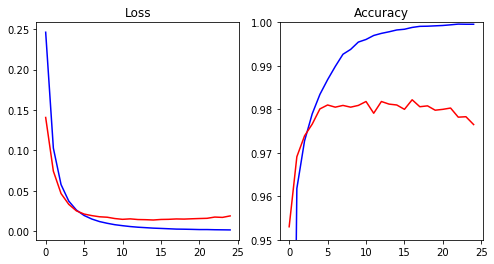

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), squeeze=True)
axes[0].set_title("Loss")
axes[0].plot(hybrid2_history.history["loss"], c="b")
axes[0].plot(hybrid2_history.history["val_loss"], c="r")

axes[1].set_title("Accuracy")
axes[1].set_ylim((0.95, 1))
axes[1].plot(hybrid2_history.history["categorical_accuracy"], c="b")
axes[1].plot(hybrid2_history.history["val_categorical_accuracy"], c="r")

In [9]:
import skfuzzy as skf
import keras.backend as K


hybrid3 = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28,28)),
    layers.Conv2D(8, (5, 5), strides=(1, 1), activation="relu"),
    layers.Flatten(),
    GaussMembership(20),
    layers.Lambda(lambda x: normalized_product_fn(x)),
    layers.Dense(10, activation="sigmoid"),
])

def fcm_parameters(model, X, num_rules):
    intermediate = K.function(model.inputs, [model.layers[2].output])([X])[0]
    centers, memberships, u0, d, jm, p, fpc = skf.cmeans(
        intermediate.T, num_rules, 1.1, 1e-8, 100, seed=0)
    return centers, np.ones(centers.shape)

hybrid3.layers[1].set_weights(convnet.layers[1].get_weights())
hybrid3.layers[3].set_weights(fcm_parameters(hybrid3, train_x, 20))

hybrid3.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[keras.metrics.categorical_accuracy])

hybrid3_history = hybrid3.fit(
    x=train_x,
    y=train_y,
    batch_size=64,
    epochs=25,
    verbose=1,
    validation_data=(test_x, test_y),
    shuffle=True,)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 98us/step - loss: 0.4435 - categorical_accuracy: 0.3507 - val_loss: 0.3168 - val_categorical_accuracy: 0.4600
Epoch 2/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.2648 - categorical_accuracy: 0.5372 - val_loss: 0.2157 - val_categorical_accuracy: 0.6264
Epoch 3/25
60000/60000 [==============================] - 6s 93us/step - loss: 0.1768 - categorical_accuracy: 0.6987 - val_loss: 0.1459 - val_categorical_accuracy: 0.7377
Epoch 4/25
60000/60000 [==============================] - 6s 93us/step - loss: 0.1292 - categorical_accuracy: 0.7550 - val_loss: 0.1169 - val_categorical_accuracy: 0.7586
Epoch 5/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.1089 - categorical_accuracy: 0.7671 - val_loss: 0.1019 - val_categorical_accuracy: 0.7677
Epoch 6/25
60000/60000 [==============================] - 6s 94us/step - loss: 0.0983 - categor

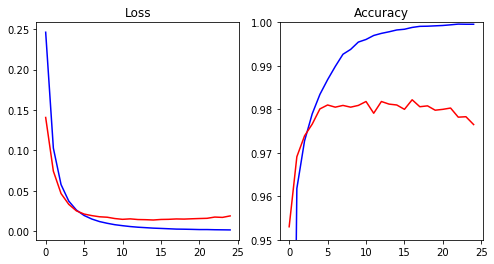

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), squeeze=True)
axes[0].set_title("Loss")
axes[0].plot(hybrid3_history.history["loss"], c="b")
axes[0].plot(hybrid3_history.history["val_loss"], c="r")

axes[1].set_title("Accuracy")
axes[1].set_ylim((0.95, 1))
axes[1].plot(hybrid3_history.history["categorical_accuracy"], c="b")
axes[1].plot(hybrid3_history.history["val_categorical_accuracy"], c="r")

In [12]:
hybrid4 = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28,28)),
    layers.Conv2D(8, (5, 5), strides=(1, 1), activation="relu", trainable=False),
    layers.Flatten(),
    GaussMembership(20),
    layers.Lambda(lambda x: normalized_product_fn(x)),
    layers.Dense(10, activation="sigmoid"),
])

hybrid4.layers[1].set_weights(convnet.layers[1].get_weights())

hybrid4.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[keras.metrics.categorical_accuracy])

hybrid4_history = hybrid4.fit(
    x=train_x,
    y=train_y,
    batch_size=64,
    epochs=25,
    verbose=1,
    validation_data=(test_x, test_y),
    shuffle=True,)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 94us/step - loss: 0.3757 - categorical_accuracy: 0.3565 - val_loss: 0.2954 - val_categorical_accuracy: 0.6570
Epoch 2/25
60000/60000 [==============================] - 5s 89us/step - loss: 0.2660 - categorical_accuracy: 0.7466 - val_loss: 0.2352 - val_categorical_accuracy: 0.7704
Epoch 3/25
60000/60000 [==============================] - 5s 88us/step - loss: 0.2116 - categorical_accuracy: 0.8035 - val_loss: 0.1873 - val_categorical_accuracy: 0.8048
Epoch 4/25
60000/60000 [==============================] - 5s 89us/step - loss: 0.1721 - categorical_accuracy: 0.7752 - val_loss: 0.1574 - val_categorical_accuracy: 0.7264
Epoch 5/25
60000/60000 [==============================] - 5s 88us/step - loss: 0.1439 - categorical_accuracy: 0.7346 - val_loss: 0.1330 - val_categorical_accuracy: 0.7209
Epoch 6/25
60000/60000 [==============================] - 5s 89us/step - loss: 0.1264 - categor

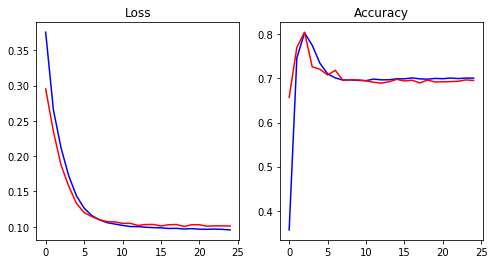

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), squeeze=True)
axes[0].set_title("Loss")
axes[0].plot(hybrid4_history.history["loss"], c="b")
axes[0].plot(hybrid4_history.history["val_loss"], c="r")

axes[1].set_title("Accuracy")
#axes[1].set_ylim((0.95, 1))
axes[1].plot(hybrid4_history.history["categorical_accuracy"], c="b")
axes[1].plot(hybrid4_history.history["val_categorical_accuracy"], c="r")